# Predictive Machine Learning Project - Module 7

**Author:** Blessing Aganaga

[Project Repository](https://github.com/teflxndxn/datafun-07-applied.git)



In [2]:
# Import common libraries for data science and ML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For linear regression and train/test splitting
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Set some plot styles
sns.set(style="whitegrid")


## Part 1 - Chart a Straight Line


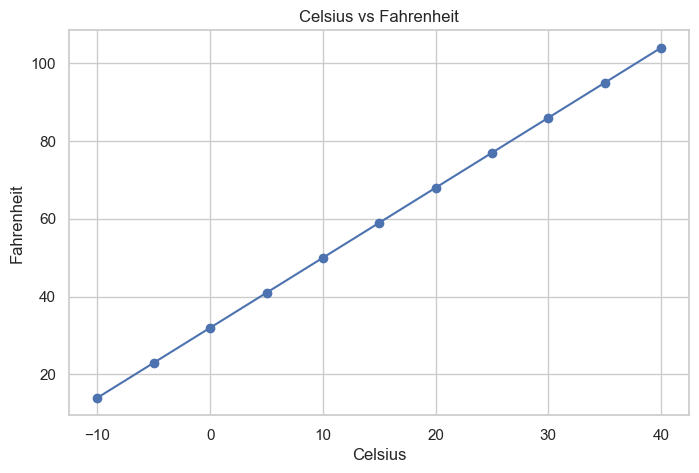

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Create data for Celsius and Fahrenheit
data = {
    'Celsius': range(-10, 41, 5),
}
df = pd.DataFrame(data)
df['Fahrenheit'] = df['Celsius'] * 9/5 + 32

# Plot Celsius vs Fahrenheit
plt.figure(figsize=(8,5))
plt.plot(df['Celsius'], df['Fahrenheit'], marker='o', linestyle='-', color='b')
plt.title('Celsius vs Fahrenheit')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.grid(True)
plt.show()


### The Line Equation: \( y = mx + b \)

- **y** is the value we want to predict (Fahrenheit temperature).
- **x** is the input value (Celsius temperature).
- **m** is the slope of the line (how steep it is). It tells us how much y changes for each change in x.
- **b** is the y-intercept (where the line crosses the y-axis). It represents the Fahrenheit value when Celsius is 0.
